In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
import seaborn as sb
%matplotlib inline


##### InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country


In [2]:
import warnings
warnings.filterwarnings("ignore")
sb.set_style("whitegrid")


In [225]:
import missingno as msno # missing data visualization
import pandas_profiling
import datetime as dt

In [4]:
data=pd.read_csv("F:\Dataset\ecommerce_data.csv", encoding='ISO-8859-1')

In [5]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Checking missing values for each column

In [7]:
data.isnull().sum() # checking missing values for each column 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data[data.isnull().any(axis=1)].head(10) #extarcting rows with atleast 1 missing value in its columns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [9]:
data.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### changeing data format of  "Invoice date"

In [10]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [12]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['InvoiceDate'].head(4)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

#### change description - UPPER case to lower case

In [13]:
data["Description"]=data.Description.str.lower()
data["Description"].head(3)

0    white hanging heart t-light holder
1                   white metal lantern
2        cream cupid hearts coat hanger
Name: Description, dtype: object

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Removing rows with missing values

In [15]:
data_new=data.dropna(axis=0)

#### checking missing values in rows

In [16]:
data_new[data_new.isnull().any(axis=1)].sum()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


#### changing customer id type from string to int 

In [18]:
data_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
data_new["CustomerID"]=data_new["CustomerID"].astype("int64")

In [20]:
data_new["CustomerID"].head(12)

0     17850
1     17850
2     17850
3     17850
4     17850
5     17850
6     17850
7     17850
8     17850
9     13047
10    13047
11    13047
Name: CustomerID, dtype: int64

#### summary stats

In [21]:
data_new.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Removing quantity with negative values

In [22]:
df=data_new[data_new.Quantity>0]

In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### Adding teh column - amount spent

In [24]:
df["AmountSpent"]= df.Quantity*df.UnitPrice

In [25]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### rearranging the added column

In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'AmountSpent'],
      dtype='object')

In [27]:
df=df[['InvoiceNo', 'InvoiceDate','StockCode', 'Description', 'Quantity',
       'UnitPrice', 'AmountSpent','CustomerID', 'Country']]

In [28]:
df.head(4)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom


#### Breaking Invoice date column into month day hour

In [29]:
# df.insert(loc=2, column="day", value=df["InvoiceDate"].map(lambda x: 100*x.year+x.month))
# insert column into data fram at specified location
# datetime.datetime.hour(df["InvoiceDate"])

##### So, learning with datetime module in pandas:

https://www.youtube.com/watch?v=yCgJGsg0Xa4


https://youtu.be/-NbY7E9hKxk?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y

In [30]:
df["InvoiceDate"].dt.hour.head(4)

0    8
1    8
2    8
3    8
Name: InvoiceDate, dtype: int64

In [31]:
df["InvoiceDate"].dt.weekday_name.head(4)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
Name: InvoiceDate, dtype: object

In [32]:
df["InvoiceDate"].dt.weekday.head(4)

0    2
1    2
2    2
3    2
Name: InvoiceDate, dtype: int64

In [33]:
df["InvoiceDate"].dt.dayofyear.head(4)

0    335
1    335
2    335
3    335
Name: InvoiceDate, dtype: int64

In [34]:
# df["InvoiceDate">="12/8/2010"]
ts=pd.to_datetime('12/9/2010')
df.loc[df['InvoiceDate']>ts, :].head(4)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
19632,537879,2010-12-09 08:34:00,22114,hot water bottle tea and sympathy,12,3.95,47.4,14243,United Kingdom
19633,537879,2010-12-09 08:34:00,22835,hot water bottle i am so poorly,8,4.65,37.2,14243,United Kingdom
19634,537879,2010-12-09 08:34:00,85150,ladies & gentlemen metal sign,6,2.55,15.3,14243,United Kingdom
19635,537879,2010-12-09 08:34:00,85048,15cm christmas glass ball 20 lights,4,7.95,31.8,14243,United Kingdom


In [35]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
(df['InvoiceDate'].max()-df['InvoiceDate'].min()).days


373

In [37]:
df["InvoiceDate"].dt.year.value_counts()

2011    371764
2010     26160
Name: InvoiceDate, dtype: int64

In [38]:
df["InvoiceDate"].dt.month.value_counts().sort_index()

1     21232
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
10    49557
11    64545
12    43464
Name: InvoiceDate, dtype: int64

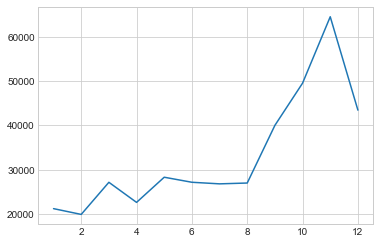

In [39]:
df["InvoiceDate"].dt.month.value_counts().sort_index().plot()

#### Most of the purchases were done in month of november

In [40]:
df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
AmountSpent           float64
CustomerID              int64
Country                object
dtype: object

## Back to Data Cleaning

In [41]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'AmountSpent', 'CustomerID', 'Country'],
      dtype='object')

In [42]:
month=df['InvoiceDate'].dt.month

In [234]:
day=df['InvoiceDate'].dt.weekday_name

In [44]:
hour=df['InvoiceDate'].dt.hour
hour.head()

0    8
1    8
2    8
3    8
4    8
Name: InvoiceDate, dtype: int64

In [236]:
# df.insert(loc=2, column="month", value=month)
del df["day"]
df.insert(loc=3, column="day", value=day)
# df.insert(loc=4, column="hour", value=hour)

In [237]:
df.head()

,InvoiceNo,InvoiceDate,month,day,StockCode,Description,hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,12,Wednesday,85123A,white hanging heart t-light holder,8,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,12,Wednesday,71053,white metal lantern,8,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,12,Wednesday,84406B,cream cupid hearts coat hanger,8,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,12,Wednesday,84029G,knitted union flag hot water bottle,8,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,12,Wednesday,84029E,red woolly hottie white heart.,8,6,3.39,20.34,17850,United Kingdom


# EDA

## How many orders made by the customers?

In [47]:
# df.groupby(by=[["CustomerID","Country" ]], as_index=False)["InvoiceNo"].count()

In [199]:
df.groupby(by=["CustomerID","Country" ], as_index=False)["InvoiceNo"].count().head()
# df.groupby(by=["CustomerID","Country" ])["InvoiceNo"].count() - this will take customerID column asindex

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [204]:
orders=df.groupby(by=["CustomerID","Country" ], as_index=False)["InvoiceNo"].count()
orders.sort_values(by="InvoiceNo", ascending=False).head(6)

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379


##### Result-


Top 5 orders from Ireland and UK

In [195]:
orders.sort_values(by="InvoiceNo", ascending=False)

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


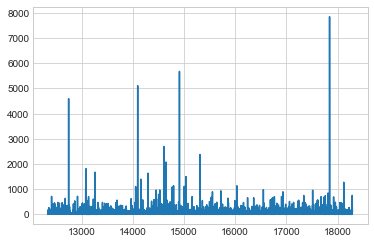

In [51]:
plt.plot(orders.CustomerID, orders.InvoiceNo)


In [52]:
# sb.barplot(x=orders.CustomerID, y=orders.InvoiceNo)- Doubt

#### Check TOP 5 most number of orders

In [53]:
orders.sort_values(by="InvoiceNo", ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


#### How much money spent by the customers

In [54]:
MoneySpent=df.groupby(by=["CustomerID", "Country"], as_index=False)["AmountSpent"].sum().sort_values(by="AmountSpent", ascending=False)
MoneySpent.head()

,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


##### Result-

Money Spent by top 5 customers , who are from Netherlands, UK, and Ireland

#### Aggregate and Transform in Pandas - Doubt

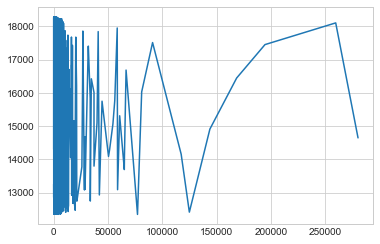

In [55]:
plt.plot( MoneySpent.AmountSpent, MoneySpent.CustomerID)

### How many orders per month?

In [211]:
df.head()

,InvoiceNo,InvoiceDate,month,day,StockCode,Description,hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,12,1,85123A,white hanging heart t-light holder,8,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,12,1,71053,white metal lantern,8,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,12,1,84406B,cream cupid hearts coat hanger,8,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,12,1,84029G,knitted union flag hot water bottle,8,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,12,1,84029E,red woolly hottie white heart.,8,6,3.39,20.34,17850,United Kingdom


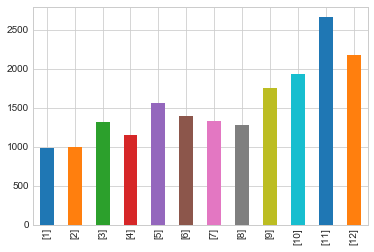

In [209]:
y=df.groupby(by="InvoiceNo")["month"].unique().value_counts().sort_index()
# sb.barplot(df.month, y)
y.plot("bar", color=color)

##### Result-

Maximum orders were in month of November

In [ ]:
# plt.plot df.groupby(by="InvoiceNo")["month"].unique().value_counts())

### How many orders per day?

In [210]:
df.groupby(by="InvoiceNo")["day"].unique().value_counts().sort_index()

[1]     709
[2]     613
[3]     520
[4]     629
[5]     723
[6]     801
[7]     773
[8]     771
[9]     660
[10]    627
[11]    629
[12]    507
[13]    596
[14]    670
[15]    553
[16]    650
[17]    694
[18]    572
[19]    519
[20]    661
[21]    594
[22]    564
[23]    579
[24]    583
[25]    562
[26]    447
[27]    546
[28]    624
[29]    404
[30]    443
[31]    313
Name: day, dtype: int64

In [63]:
rand=np.random.uniform(0,1)
rand

0.49190913556031335

### Discover patterns for Number of Orders

#### Available colors

In [99]:
color=sb.color_palette(n_colors=14)

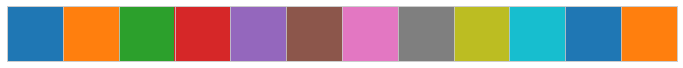

In [77]:
sb.palplot(color)

In [79]:
df.head()

,InvoiceNo,InvoiceDate,month,day,StockCode,Description,hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,12,1,85123A,white hanging heart t-light holder,8,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,12,1,71053,white metal lantern,8,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,12,1,84406B,cream cupid hearts coat hanger,8,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,12,1,84029G,knitted union flag hot water bottle,8,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,12,1,84029E,red woolly hottie white heart.,8,6,3.39,20.34,17850,United Kingdom


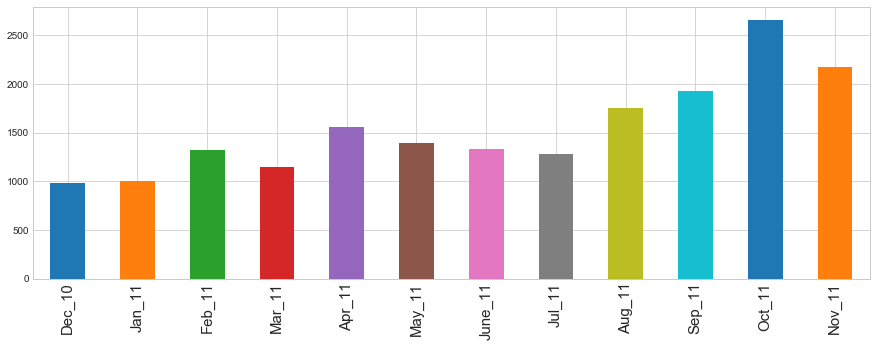

In [110]:
y=df.groupby(by="InvoiceNo")["month"].unique().value_counts()
y.sort_index().plot("bar",color=color,figsize=(15,5)).set_xticklabels(("Dec_10", "Jan_11","Feb_11", "Mar_11", "Apr_11","May_11","June_11", "Jul_11","Aug_11", "Sep_11","Oct_11","Nov_11","Dec_11"), fontsize=15)
plt.show()

### How many orders (per day)?

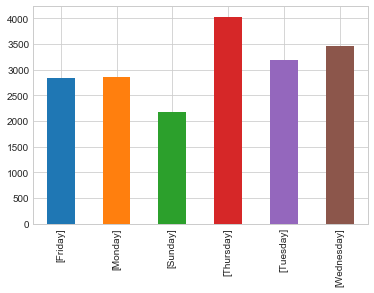

In [239]:
df.head()
df.groupby(by="InvoiceNo")["day"].unique().value_counts().sort_index().plot("bar", color=color)

##### Result-

Maximum orders were made on Thursday

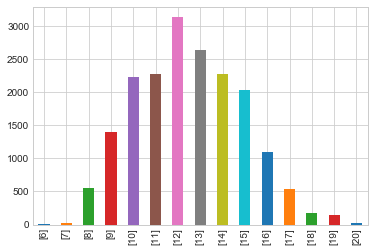

In [123]:
df.head()
z=df.groupby(by="InvoiceNo")["hour"].unique().value_counts()
z.iloc[:-1].sort_index().plot("bar", color=color)

##### Result-


Most of the purchases were done between 11 AM -3 PM

## Discover patterns for Unit Price

In [125]:
df.head(3)

,InvoiceNo,InvoiceDate,month,day,StockCode,Description,hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,12,1,85123A,white hanging heart t-light holder,8,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,12,1,71053,white metal lantern,8,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,12,1,84406B,cream cupid hearts coat hanger,8,8,2.75,22.00,17850,United Kingdom


In [127]:
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

##### Result-


there were few high price purchases and mostly were of low price

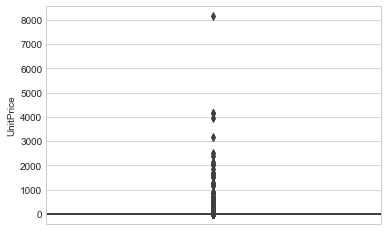

In [135]:
sb.boxplot(x=df.UnitPrice,orient="v", palette=color, width=2, saturation=2)

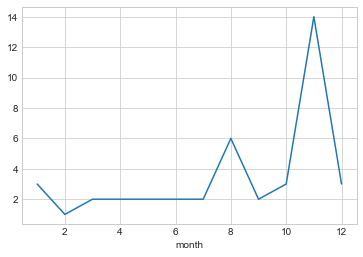

In [193]:
df_free=df[df.UnitPrice==0]
df_free.groupby(by="month")["month"].count().plot()

##### Result-


Free items were given in the month of november where maximum purchases have been made

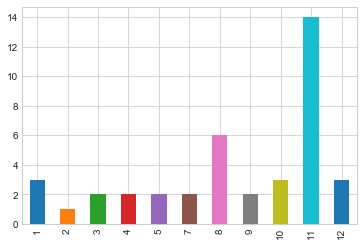

In [145]:
df_free.month.value_counts().sort_index().plot("bar", color=color)

In [147]:
df.head(4)

,InvoiceNo,InvoiceDate,month,day,StockCode,Description,hour,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,12,1,85123A,white hanging heart t-light holder,8,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,12,1,71053,white metal lantern,8,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,12,1,84406B,cream cupid hearts coat hanger,8,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,12,1,84029G,knitted union flag hot water bottle,8,6,3.39,20.34,17850,United Kingdom


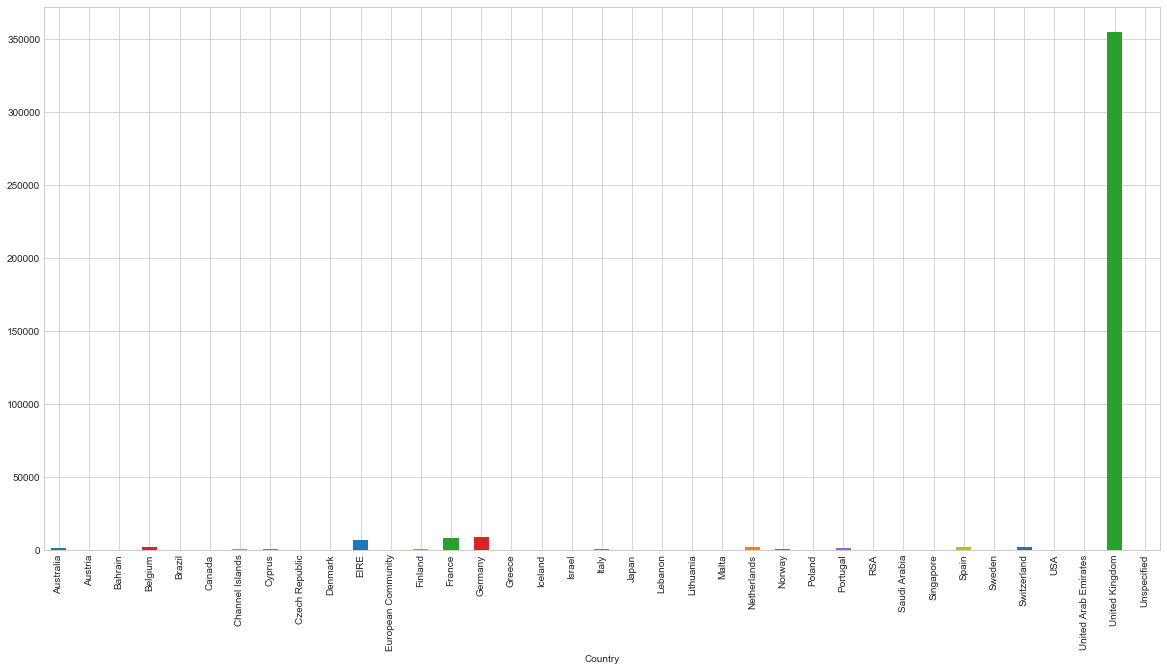

In [157]:
df.Country.mode()
df.groupby(by=df.Country)["InvoiceNo"].count().plot("bar", figsize=(20,10))

##### Result-


Most of the customer from UK 

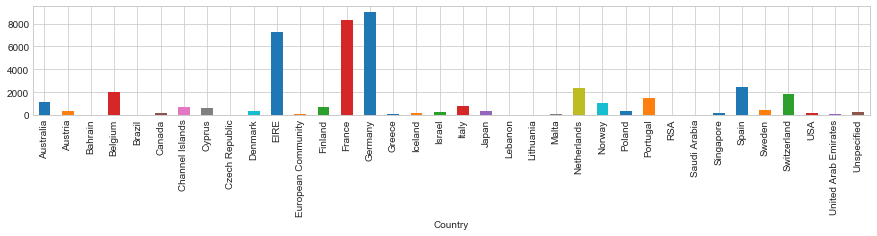

In [241]:
group_ofordersbyCountry=df.groupby(by=df.Country)["InvoiceNo"].count()
del group_ofordersbyCountry["United Kingdom"]# Removing UK 
group_ofordersbyCountry.plot("bar", color=color, figsize=(15,2))

##### Findings-

Large customer base from Germany , France, Ireland but they neither purchase high price products, 


nor they purchase the items in large number

### How much money spent by each country

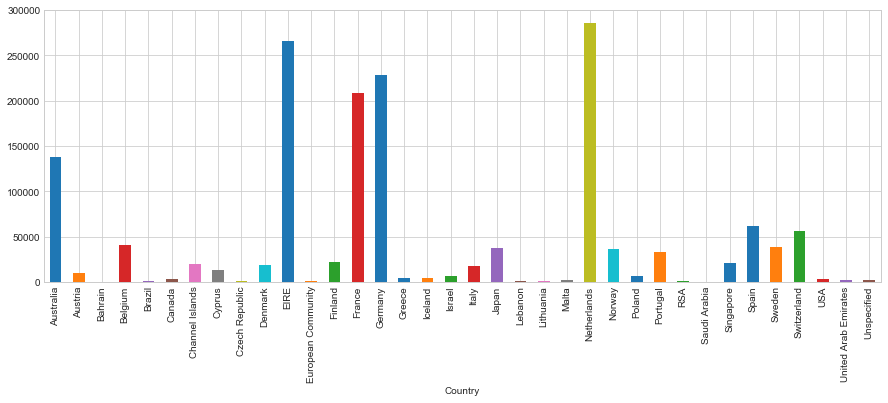

In [182]:
money_spent_byCountry=df.groupby(by="Country")["AmountSpent"].sum()
del money_spent_byCountry["United Kingdom"] # Removing UK
money_spent_byCountry.plot("bar", color=color, figsize=(15,5))


##### Finding-


Customers from Netherland tend to purchase high price products